In [ ]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_class)

# Example usage:
if __name__ == "__main__":
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    bc = datasets.load_breast_cancer()
    X, y = bc.data, bc.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    regressor = LogisticRegression(learning_rate=0.001, n_iterations=1000)
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)

    print("Accuracy:", np.mean(predictions == y_test))


<ipython-input-1-c1674febaf1b>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Accuracy: 0.9473684210526315


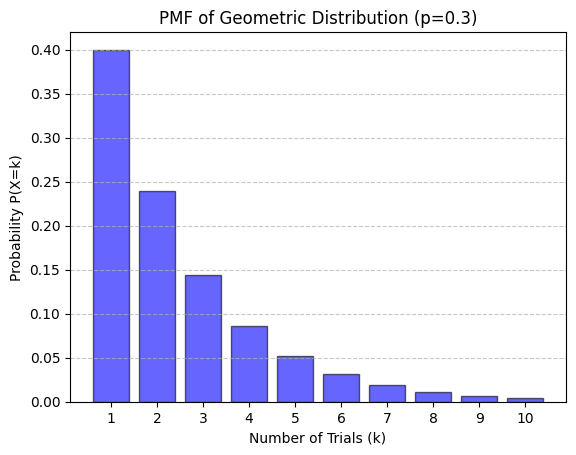

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define probability of success
p = 0.4

# Generate values for k (number of trials until first success)
k_values = np.arange(1, 11)  # First 10 trials
pmf_values = stats.geom.pmf(k_values, p)

# Plot the PMF
plt.bar(k_values, pmf_values, color='blue', alpha=0.6, edgecolor='black')
plt.xlabel('Number of Trials (k)')
plt.ylabel('Probability P(X=k)')
plt.title('PMF of Geometric Distribution (p=0.3)')
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.show()
